In [1]:
import sklearn.datasets
import sklearn.utils
digits = sklearn.datasets.load_digits()
X_all, y_all = sklearn.utils.shuffle(
    digits.data, digits.target, random_state=42)
holdout_size = 200
X_train, y_train = X_all[holdout_size:], y_all[holdout_size:]
X_test, y_test = X_all[:holdout_size], y_all[:holdout_size]
print('expected\n{}'.format(y_test))

expected
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8]


In [2]:
from lalegpl.lib.weka import J48
print(f'hyperparam_defaults {J48.hyperparam_defaults()}')
print(f"hyperparam_schema('C') {J48.hyperparam_schema('C')}")

hyperparam_defaults {'U': False, 'O': False, 'C': 0.25, 'M': 2, 'R': False, 'N': 3, 'B': False, 'S': False, 'L': False, 'A': False, 'J': False, 'Q': 1, 'doNotMakeSplitPointActualValue': False, 'output_debug_info': False, 'do_not_check_capabilities': False, 'num_decimal_places': 2, 'batch_size': 100}
hyperparam_schema('C') {'description': 'Set confidence threshold for pruning.', 'type': 'number', 'default': 0.25, 'minimum': 0.01, 'exclusiveMinimum': True, 'maximum': 1, 'exclusiveMaximum': True, 'maximumForOptimizer': 0.5}


In [3]:
trainable_J48 = J48()
trained_J48 = trainable_J48.fit(X_train, y_train)
predicted = trained_J48.predict(X_test)
print('predicted\n{}'.format(predicted))

predicted
[6 9 3 7 2 1 5 3 5 2 2 6 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 6 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 3 0 0 8 0 4 5 2 4 5 7 0 7 5 9 5 5 6
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 6 9 1 2 8 3 5 2 9 4 4 4 4 3 7 3 1 8 5 8 4 2 7
 7 4 4 1 9 7 7 8 7 2 6 9 6 2 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 9 9 3 8 7 2 0 0 4 5 8 6 5 9 9 8 4 2 1 2 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8]


In [4]:
import sklearn.metrics
print('accuracy {:.1%}\n  for default hyperparameters'.format(
    sklearn.metrics.accuracy_score(y_test, predicted)))

accuracy 90.0%
  for default hyperparameters


In [5]:
%%time
from lale.lib.lale import Hyperopt
trainable_hpo = Hyperopt(estimator=J48, cv=3, max_evals=10)
trained_hpo = trainable_hpo.fit(X_train, y_train)

100%|██████| 10/10 [00:18<00:00,  1.85s/trial, best loss: -0.35125960851850296]
CPU times: user 22.1 s, sys: 406 ms, total: 22.5 s
Wall time: 21.4 s


In [6]:
best = trained_hpo.get_pipeline()
predicted = best.predict(X_test)
print('accuracy {:.1%}\n  for'.format(
    sklearn.metrics.accuracy_score(y_test, predicted)))
best.pretty_print(ipython_display=True)

accuracy 36.0%
  for


```python
from lalegpl.lib.weka import J48_Impl as J48
import lale
lale.wrap_imported_operators()

pipeline = J48(B=True, L=True, M=223, N=31, R=True)
```

notebook cell [7] line 5: 2020-04-20_18-02-07 before calling fit on pipeline
notebook cell [7] line 7: 2020-04-20_18-02-08 after calling fit on pipeline


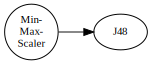

In [7]:
import lale.helpers
from lale.lib.sklearn import MinMaxScaler
scaler = MinMaxScaler()
trainable_pipe = scaler >> trainable_J48
lale.helpers.println_pos('before calling fit on pipeline')
trained_pipe = trainable_pipe.fit(X_train, y_train)
lale.helpers.println_pos('after calling fit on pipeline')
lale.helpers.to_graphviz(trained_pipe)

In [8]:
predicted = trained_pipe.predict(X_test)
print('accuracy {:.1%}\n  for pipeline with MinMaxScaler'.format(
    sklearn.metrics.accuracy_score(y_test, predicted)))

accuracy 90.0%
  for pipeline with MinMaxScaler


In [9]:
lale.helpers.println_pos('successfully reached the end of the notebook')

notebook cell [9] line 1: 2020-04-20_18-02-09 successfully reached the end of the notebook
